## Objective:
## Deploying  a predictive model to estimate the likelihood of customer churn for telecommunication company.

### importing all the required models

In [406]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#  hiding warnings
import warnings
warnings.simplefilter('ignore')

In [407]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report

## -- Reading data from the dataset

In [408]:
df=pd.read_csv('Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


### To view all the columns using, pd.set_option('display.max_columns',None)

In [409]:
pd.set_option('display.max_columns',None)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Performing Descriptive Statistics on Data

### -- checking shape of the dataset

In [410]:
df.shape

(7043, 21)

###  -- describe() function provides summary statistics about a dataset

In [411]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### -- corr() function is used to calculate the correlation matrix of a dataset, Correlation measures the strength and direction of the linear relationship between two variables. 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, 0 indicates no linear relationship.

In [412]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


### -- plotting pairplot, in Seaborn pairplot is used to create a grid of scatter plots for visualizing relationships between pairs of variables in a dataset. It is particularly useful for exploring the distribution and relationships between multiple variables in a DataFrame

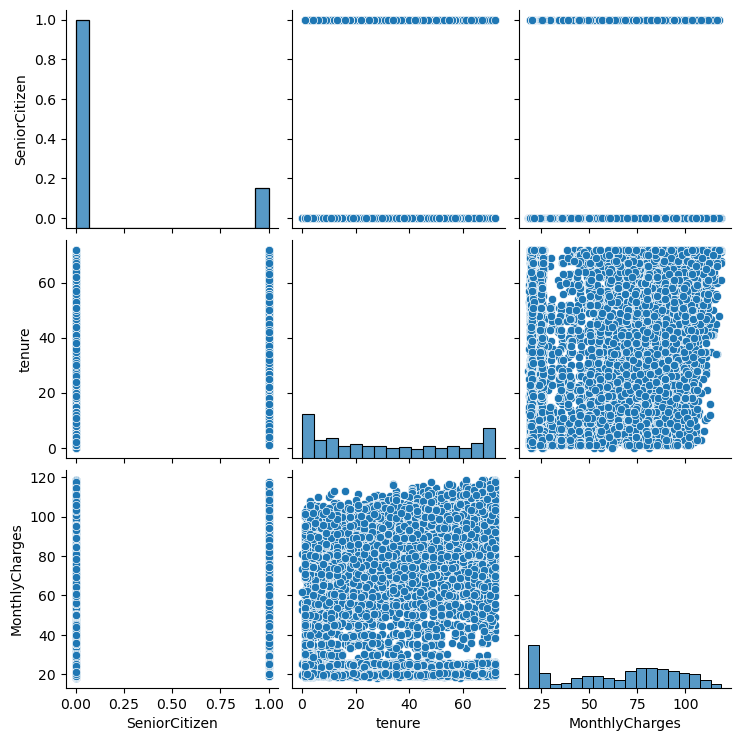

In [8]:
sns.pairplot(df);

### --Examining the correlation between predictors to identify highly correlated predictors, Using a heatmap to visualize this.

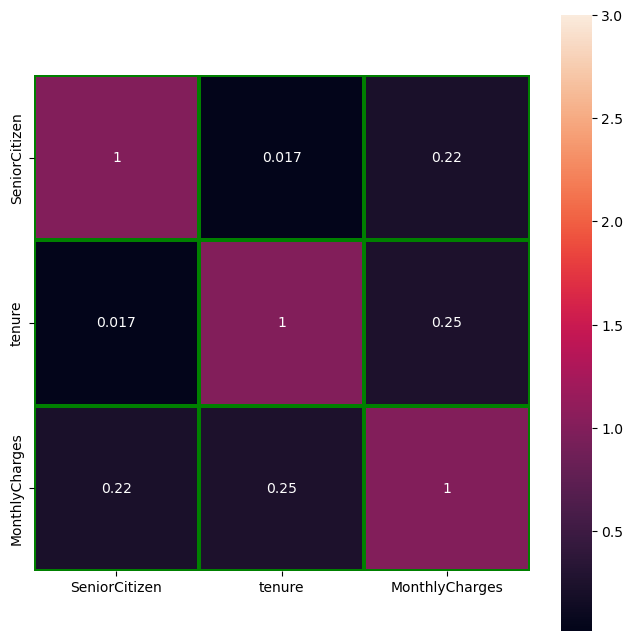

In [413]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),linewidth=1.5,linecolor='green',vmax=3,square=True,annot=True);

#### ** above we can observe that there is no high correlation between variables

### -- Displaying count of unique values in each column

In [414]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### -- info() function is used to quickly gather a summary of a DataFrame, providing essential information about the dataset's structure and contents

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### -- ckecking datatype of each column

In [416]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Checking for missing values in the dataset

In [417]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### ** there are no missing values in a dataset

### Checking for duplicate values in the dataset

In [418]:
df.duplicated().sum()

0

#### ** there are no duplicated values in a dataset

### --Deleting unwanted coloumns

In [419]:
df.drop(columns=['customerID','MultipleLines'],inplace=True)
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [420]:
display
(
    df['MonthlyCharges'].unique(),
    df['TotalCharges'].unique()
)

(array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ]),
 array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
       dtype=object))

### -- Converting the columns which are in float and object to integer

In [421]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)
df['MonthlyCharges'].dtypes

dtype('int32')

In [422]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remove the decimal part and convert to integer
df['TotalCharges'] = df['TotalCharges'].fillna(0).astype(int)

### Visualizing MonthlyCharges variable with churn variable

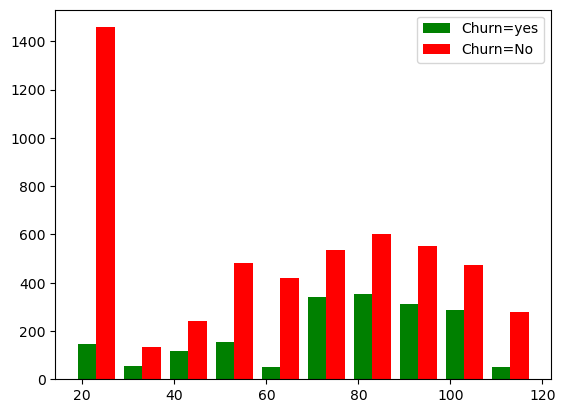

In [17]:
MonthlyCharges_yes=df[df.Churn=='Yes'].MonthlyCharges
MonthlyCharges_No=df[df.Churn=='No'].MonthlyCharges
plt.hist([MonthlyCharges_yes,MonthlyCharges_No],color=['green','red'],label=['Churn=yes','Churn=No'])
plt.legend();

### The insights we gain are people who are having monthly charges 20 to 30 are not leaving the company, and people who have monthly charges between to 70 to 100 are most likely to leave the company

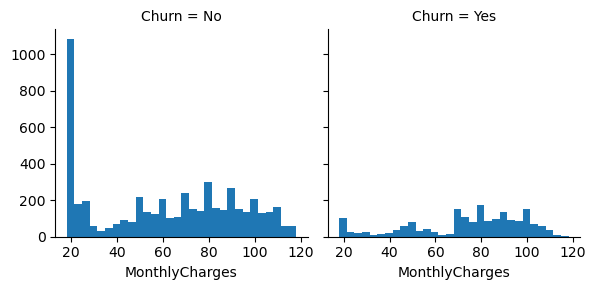

In [18]:
g=sns.FacetGrid(df,col='Churn')
g.map(plt.hist,'MonthlyCharges',bins=30);

### using countplot visualize churn with gender

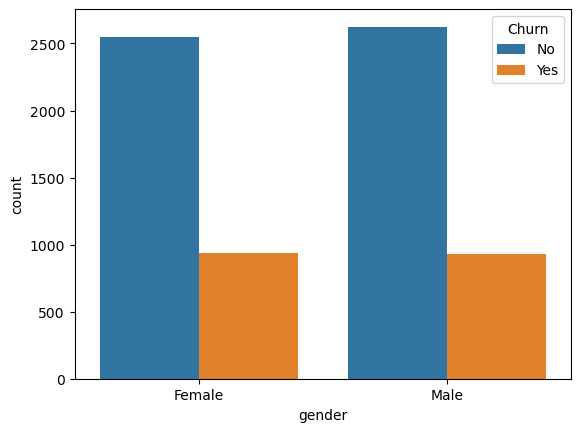

In [28]:
sns.countplot(x='gender',hue='Churn',data=df);

#### **count of both female and male are eqaul in leaving and not leaving

### --visualizing churn label with tenure feature using count plot and dist plot

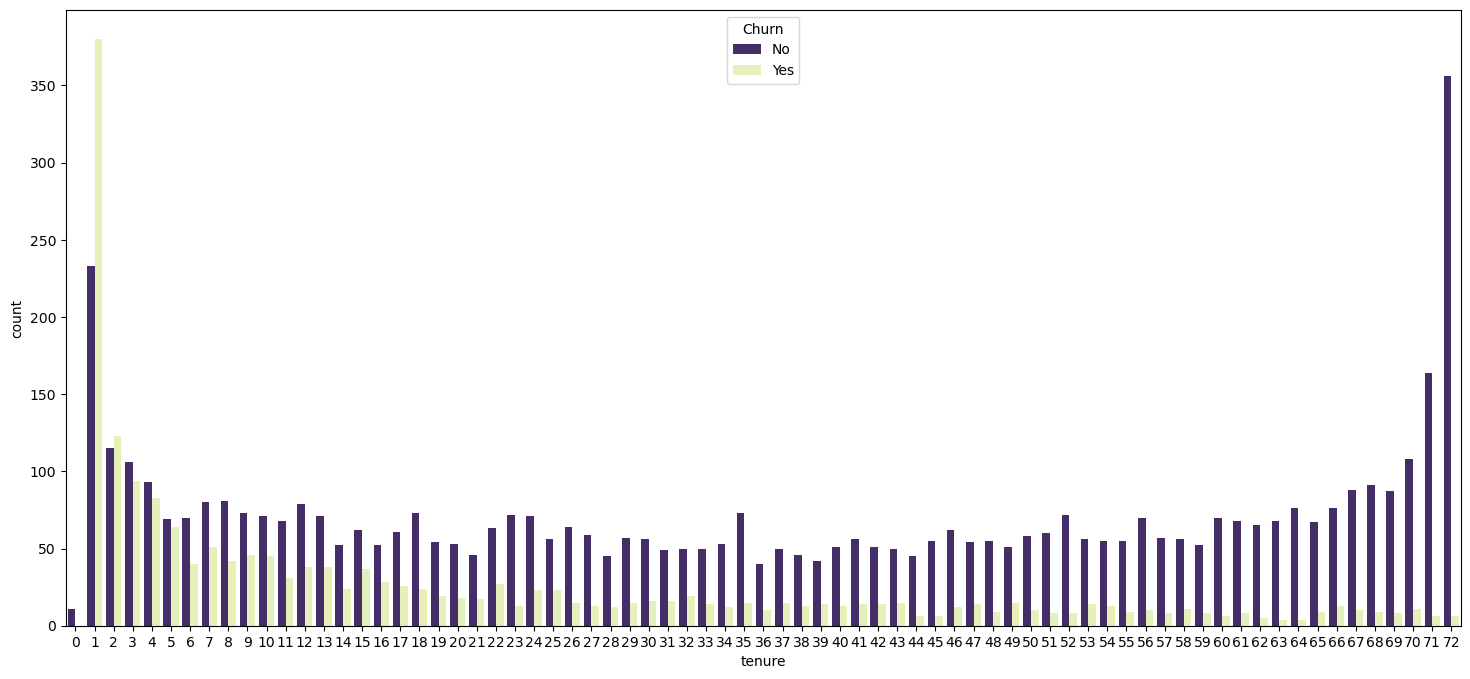

In [20]:
plt.figure(figsize=(18,8))
sns.countplot('tenure',hue='Churn',data=df,palette=['#432371',"#edf8b1"]);

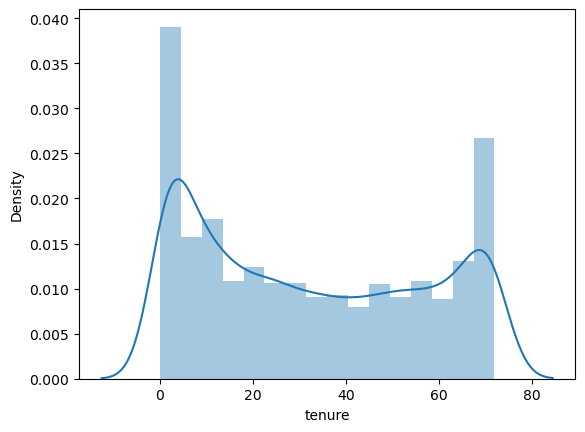

In [39]:
sns.distplot(df.tenure);

In [37]:
df.InternetService.value_counts(normalize=True)*100

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

### visualizing fot internetservice column

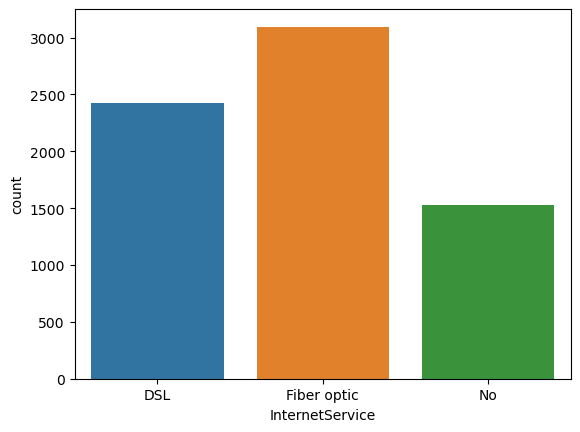

In [36]:
sns.countplot(x='InternetService',data=df);

In [423]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29,29,No


### -- Checking for outliers

MonthlyCharges


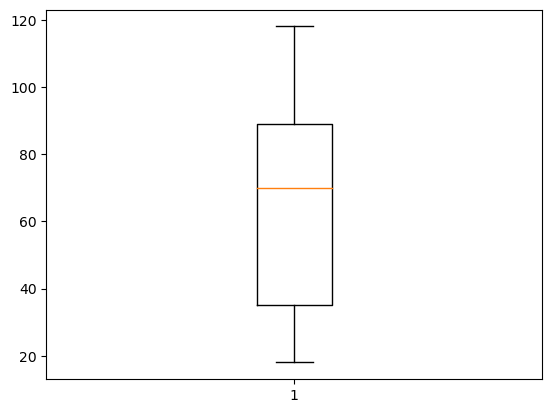

tenure


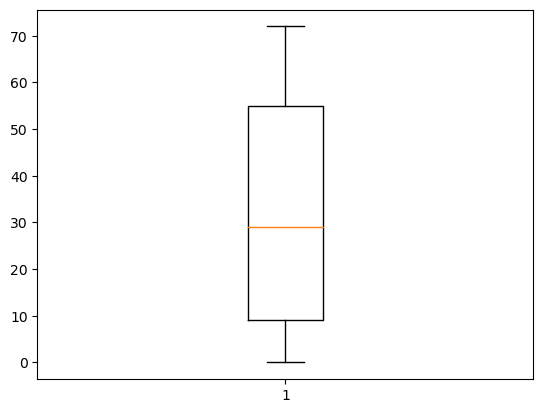

In [424]:
features=['MonthlyCharges','tenure']
for col in features:
    print(col)
    plt.boxplot(df[col])
    plt.show()

#### ** there are no outliers in the data

### -- Converting categorical values to numeric values by using Encoding

In [425]:
df=pd.get_dummies(df,columns=['StreamingMovies','gender','Partner','Dependents','PhoneService','InternetService','OnlineSecurity',
                              'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling',
                             'PaymentMethod','Churn'],drop_first=True)

In [426]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,StreamingMovies_No internet service,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29,29,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56,1889,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53,108,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42,1840,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
4,0,2,70,151,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


### --Performing Standardization on some coloumns to bring values in same range

In [427]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

In [428]:
scaler=MinMaxScaler()

In [429]:
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])
df.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,StreamingMovies_No internet service,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0.013889,0.11,0.003339,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,0.472222,0.38,0.217526,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0.027778,0.35,0.012437,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1


In [430]:
df.rename(columns = {'Churn_Yes': 'Churn'}, inplace = True)

### --Checking the distribution of the target variable. Is it imbalanced data?

In [431]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#### ** The Target variable is not imbalanced and we can use it without creating synthetic data from minority class

### --splitting data into the x and y variables

In [432]:
x=df.drop(['Churn'],axis=1)
y=df.Churn

### -- splitting data into training and testing

In [433]:
x_sm_train,x_test,y_sm_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

### -- Creating a logistic regression model and preparing the classification report.

In [434]:
# initializing model
lr_model=LogisticRegression()

In [435]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [436]:
# evaluating model
lr_model.score(x_train,y_train)

0.8027769012306721

In [437]:
lr_model.score(x_test,y_test)

0.8212765957446808

In [438]:
y_pred=lr_model.predict(x_test)

In [439]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       511
           1       0.70      0.61      0.65       194

    accuracy                           0.82       705
   macro avg       0.78      0.76      0.77       705
weighted avg       0.82      0.82      0.82       705



In [440]:
print(confusion_matrix(y_test,y_pred))

[[460  51]
 [ 75 119]]


### ** Accuracy of logistic regression model is 82%

### -- Creating a Random Forest model and preparing the classification report.

In [441]:
rf_model=RandomForestClassifier(max_depth=9)

In [442]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=9)

In [443]:
rf_model.score(x_train,y_train)

0.8373303881350583

In [444]:
rf_model.score(x_test,y_test)

0.8070921985815603

In [445]:
y_pred=rf_model.predict(x_test)

In [446]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       511
           1       0.70      0.52      0.60       194

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.73       705
weighted avg       0.80      0.81      0.80       705



In [447]:
print(confusion_matrix(y_test,y_pred))

[[469  42]
 [ 94 100]]


### -- checking variable importance for random forest model

In [448]:
rf_feature_importance=rf_model.feature_importances_
rf_importance_df=pd.DataFrame({'Feature':x.columns,'Importance':rf_feature_importance})
rf_importance_df=rf_importance_df.sort_values(by='Importance',ascending=False)
rf_importance_df

,Feature,Importance
1,tenure,0.207100
3,TotalCharges,0.166016
10,InternetService_Fiber optic,0.101406
2,MonthlyCharges,0.089345
23,Contract_Two year,0.069144
26,PaymentMethod_Electronic check,0.053488
13,OnlineSecurity_Yes,0.032490
22,Contract_One year,0.031650
19,TechSupport_Yes,0.024691
24,PaperlessBilling_Yes,0.021363


#### ** we can say that for random forest tenure and TotalCharges features have more impact than other feature

### ** Accuracy of Random forest model is 81%

### Logistic regression model predicted more accurately with accuracy 0.82 compare with Random forest classifier model with 0.81

## **Saving model**

In [449]:
# Save the trained model to a file using pickle
with open('machine_learning_model.pkl', 'wb') as model_file:
    pickle.dump(lr_model, model_file)

In [450]:
with open('machine_learning_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [451]:
# Now we can use the loaded_model to make predictions
predictions = loaded_model.predict(x_test)
print(predictions)

[1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 